In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Classifier Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier

# Regressor Model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


In [3]:
df=pd.read_csv(r"C:\Users\Good Day\Desktop\Project 5\preprocessed_data.csv")
df

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,1,1,1.0,2.00,1500.0,1670798778,2021-07-01,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,1,1,41.0,0.80,1210.0,1668701718,2021-04-01,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,3.0,1,2,28.0,0.38,952.0,628377,2021-01-01,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574.0,32.0,1,3,59.0,2.30,1317.0,1668701718,2021-01-01,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,3021156.0,28.0,1,1,1.0,4.00,2000.0,640665,2021-03-01,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181657,0B812591-B501-4F34-859A-B06381FAEB44,2020-07-02,106.783299,30200854.0,25.0,1,1,41.0,0.96,1240.0,164141591,2020-07-01,602.00
181658,DE633116-D1DF-4846-982E-55EFC3658A76,2020-07-02,102.482422,30200854.0,25.0,1,1,41.0,0.96,1220.0,164141591,2020-07-01,591.00
181659,A48374B1-E6DB-45F2-889A-1F9C27C099EB,2020-07-02,208.086469,30200854.0,25.0,1,1,41.0,0.95,1500.0,164141591,2020-07-01,589.00
181660,91643238-5C7B-4237-9A5F-63AE3D35F320,2020-07-02,4.235594,30200854.0,25.0,1,1,41.0,0.71,1250.0,164141591,2020-07-01,619.00


In [4]:
df['selling_price']=df['selling_price'].fillna(df['selling_price'].mean())

In [5]:
df.isnull().sum()

id               2
item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [6]:
def plot(df, column):

    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.boxplot(data=df, x=column)
    plt.title(f'Box Plot for {column}')

    plt.subplot(1,3,2)
    df[column].plot(kind='hist')
    # sns.histplot(data=df, x=column, kde=True)
    plt.title(f'Distribution PLot for {column}')

    plt.subplot(1,3,3)
    sns.violinplot(data=df, x=column)
    plt.title(f'Violin Plot for {column}')
    plt.show()

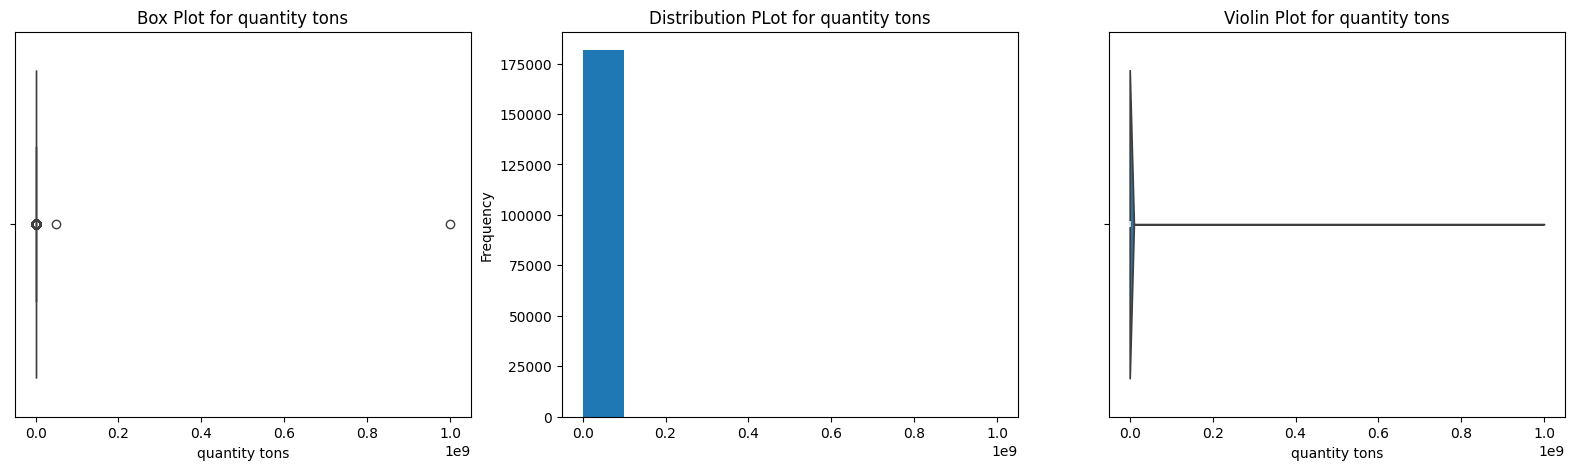

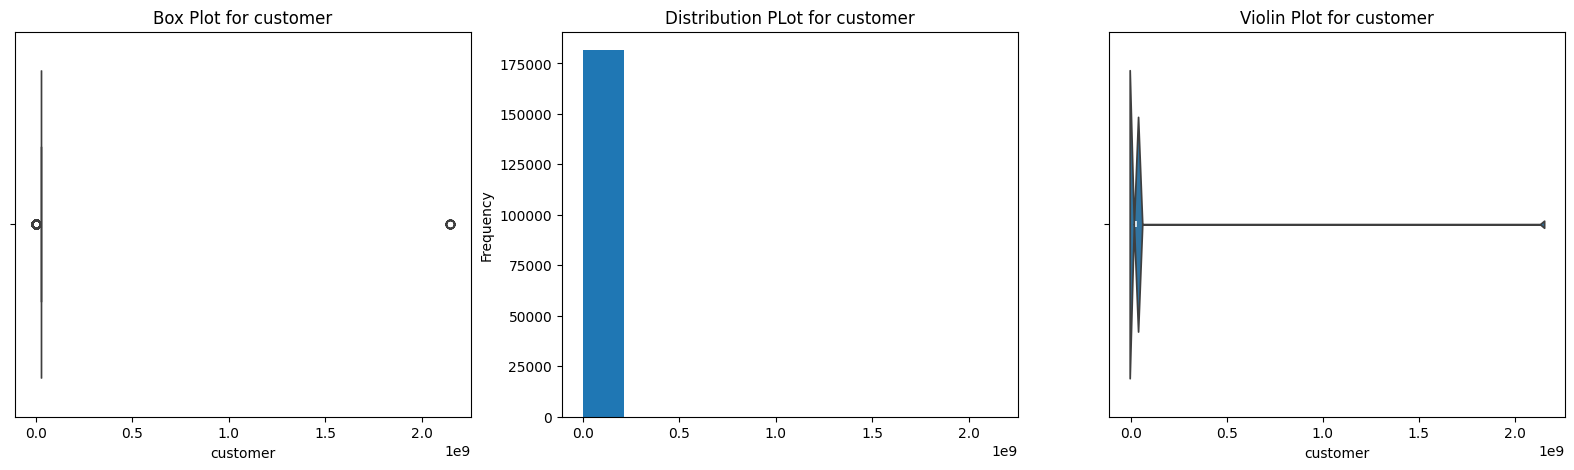

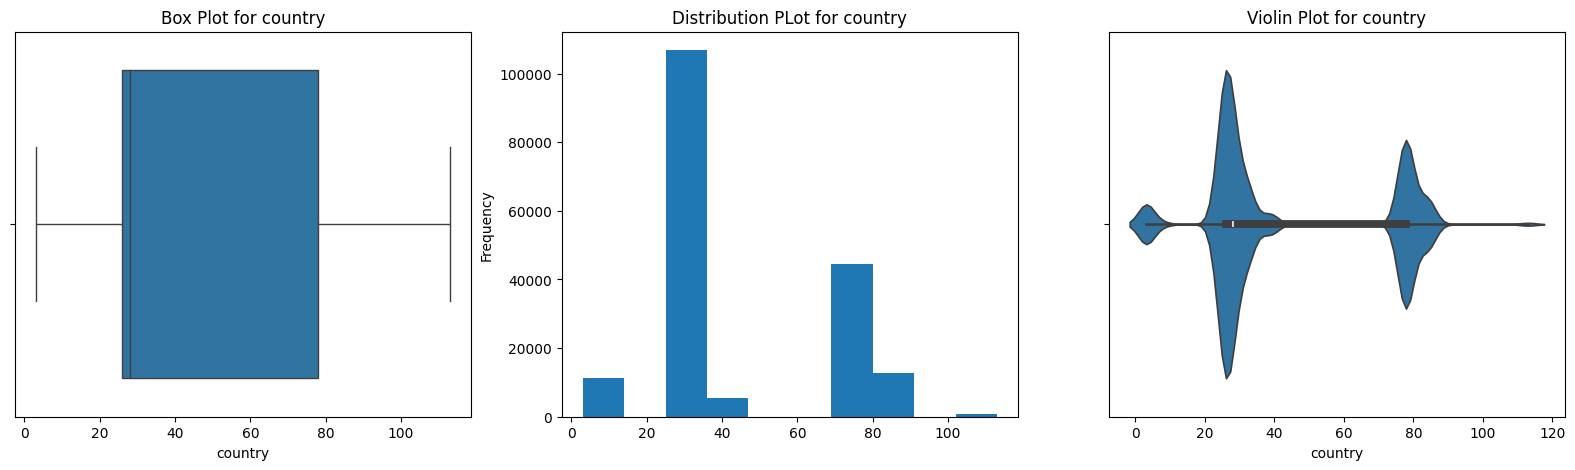

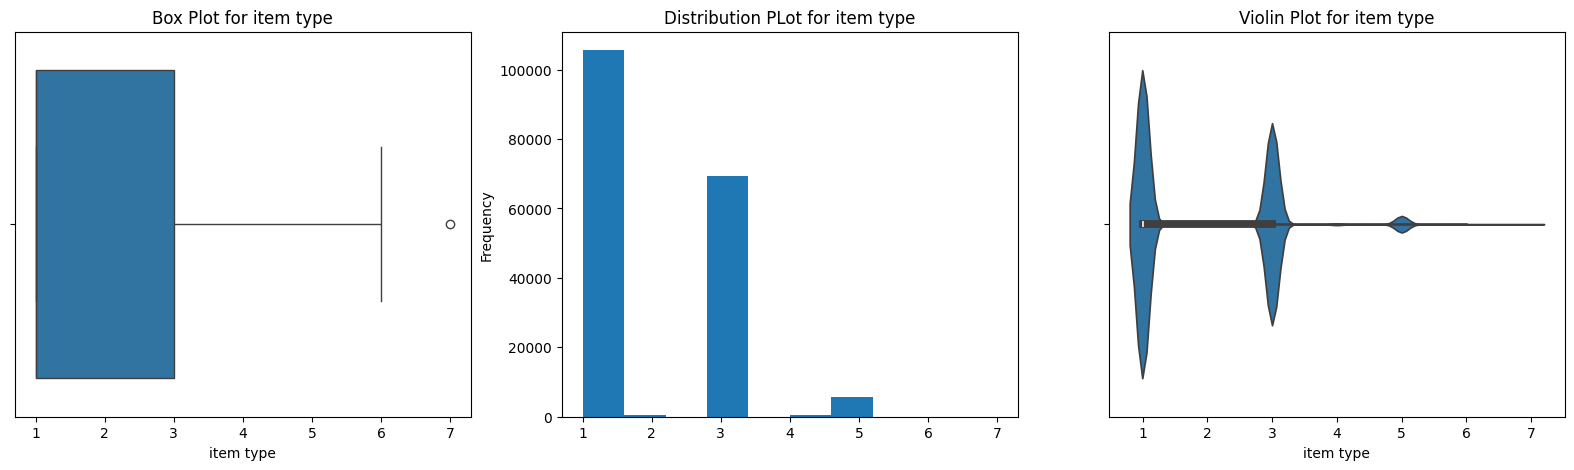

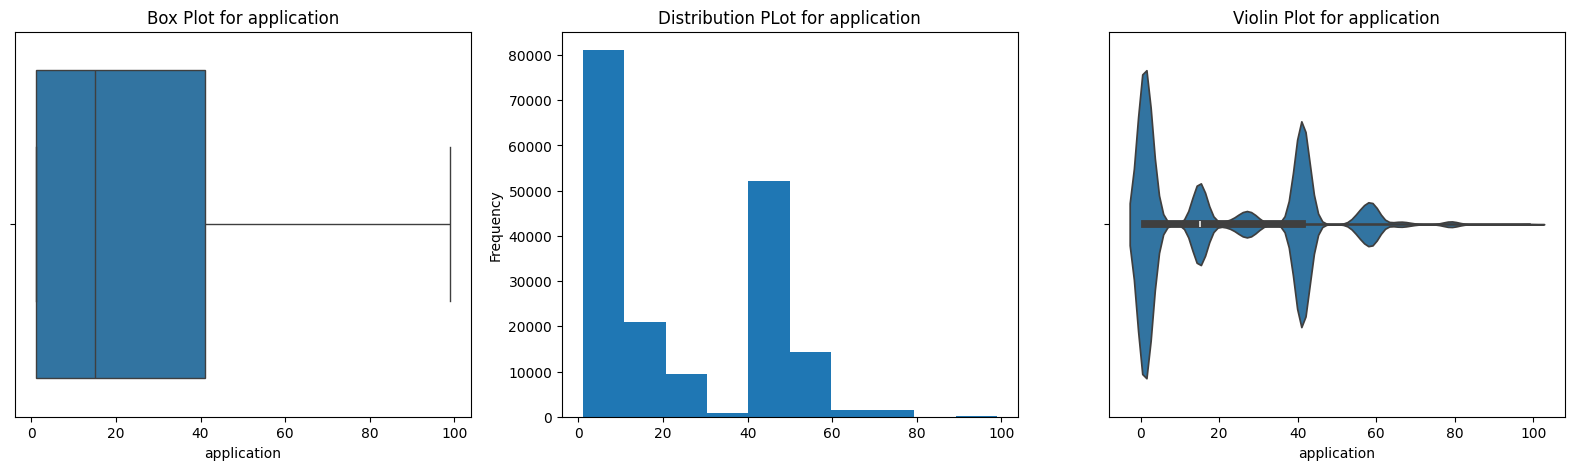

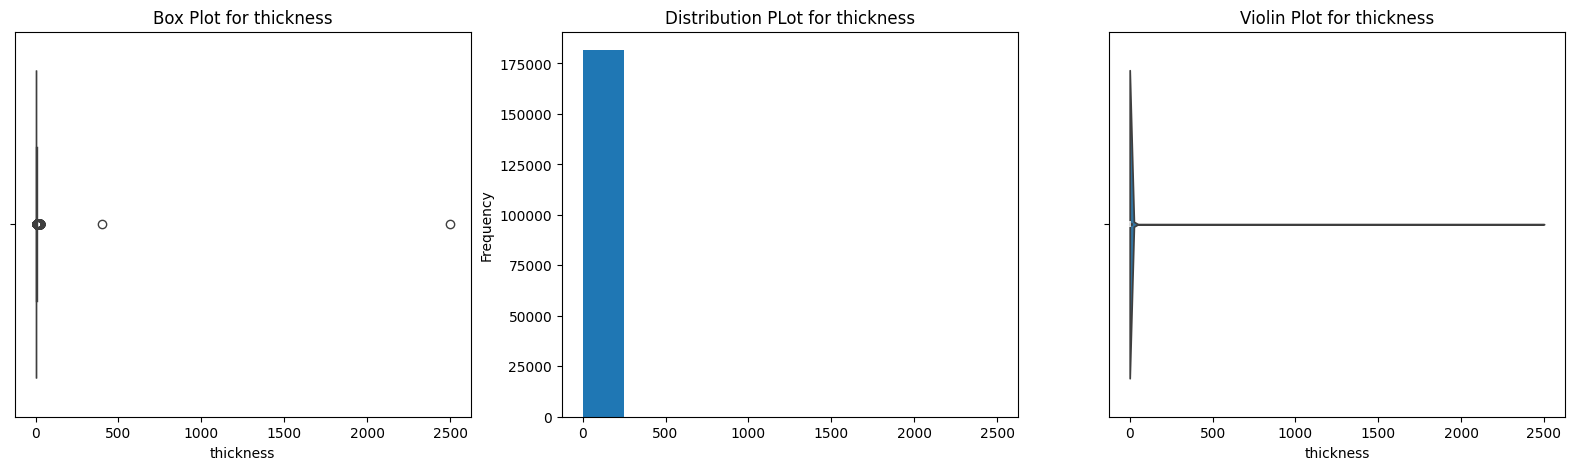

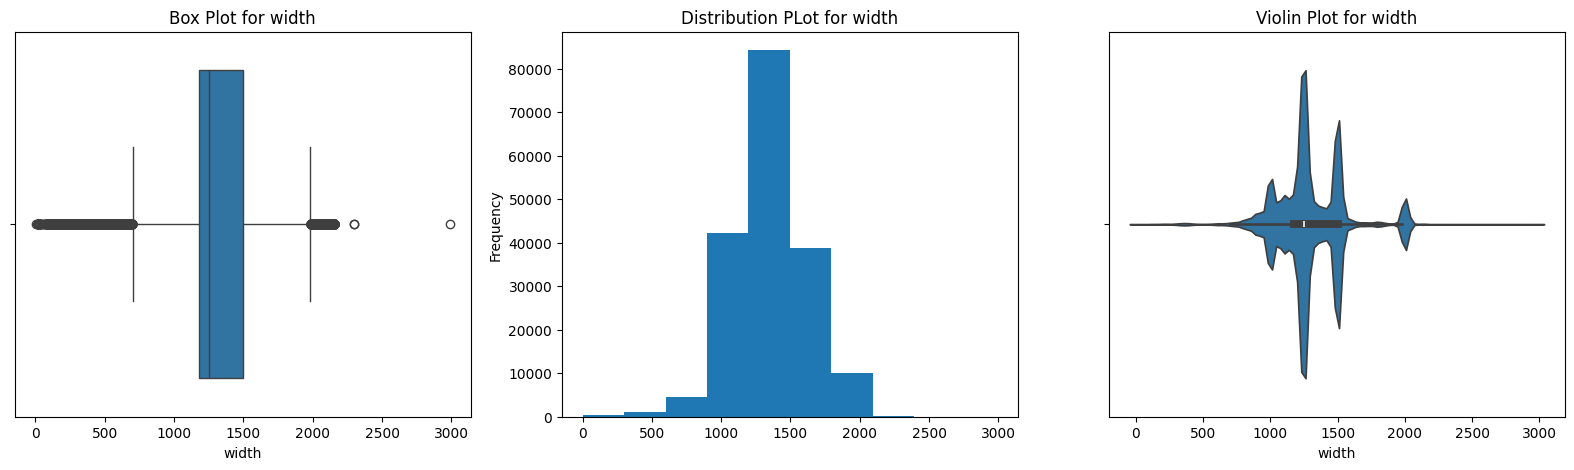

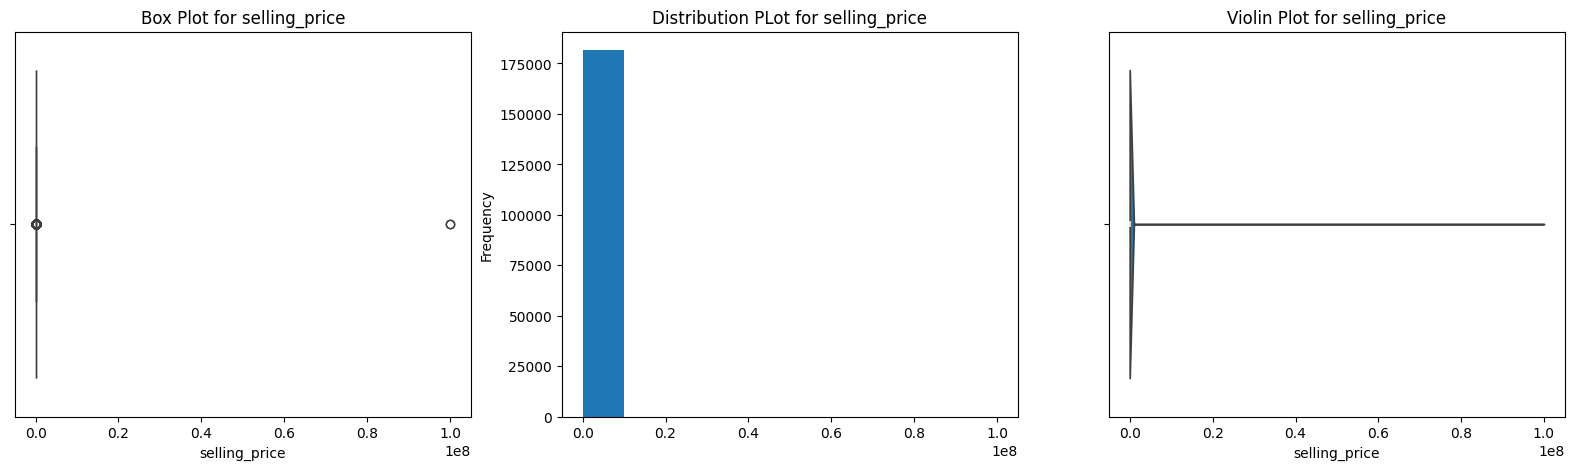

In [7]:
for i in ['quantity tons', 'customer', 'country', 'item type', 'application', 'thickness', 'width', 'selling_price']:
    plot(df, i)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181662 entries, 0 to 181661
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181660 non-null  object 
 1   item_date      181662 non-null  object 
 2   quantity tons  181662 non-null  float64
 3   customer       181662 non-null  float64
 4   country        181662 non-null  float64
 5   status         181662 non-null  int64  
 6   item type      181662 non-null  int64  
 7   application    181662 non-null  float64
 8   thickness      181662 non-null  float64
 9   width          181662 non-null  float64
 10  product_ref    181662 non-null  int64  
 11  delivery date  181662 non-null  object 
 12  selling_price  181662 non-null  float64
dtypes: float64(7), int64(3), object(3)
memory usage: 18.0+ MB


In [9]:
# quantity tons, thickness and selling price is rigth skewed, log transformation.

def transform(df, column):
    df[column]=np.log(df[column])
    return df[column]

transform(df, 'quantity tons')
transform(df, 'thickness')
transform(df, 'selling_price')

c:\Users\Good Day\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\Good Day\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


0         6.749931
1         6.953684
2         6.468211
3         6.643790
4         6.357842
            ...   
181657    6.400257
181658    6.381816
181659    6.378426
181660    6.428105
181661    6.408529
Name: selling_price, Length: 181662, dtype: float64

In [10]:
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,3.991779,30156308.0,28.0,1,1,1.0,0.693147,1500.0,1670798778,2021-07-01,6.749931
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,6.643822,30202938.0,25.0,1,1,41.0,-0.223144,1210.0,1668701718,2021-04-01,6.953684
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,5.956169,30153963.0,3.0,1,2,28.0,-0.967584,952.0,628377,2021-01-01,6.468211
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,5.310301,30349574.0,32.0,1,3,59.0,0.832909,1317.0,1668701718,2021-01-01,6.643790
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,6.666354,3021156.0,28.0,1,1,1.0,1.386294,2000.0,640665,2021-03-01,6.357842


In [11]:
def plot(df, column):

    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.boxplot(data=df, x=column)
    plt.title(f'Box Plot for {column}')

    plt.subplot(1,3,2)
    sns.histplot(data=df, x=column, kde=True)
    plt.title(f'Distribution PLot for {column}')

    plt.subplot(1,3,3)
    sns.violinplot(data=df, x=column)
    plt.title(f'Violin Plot for {column}')
    plt.show()

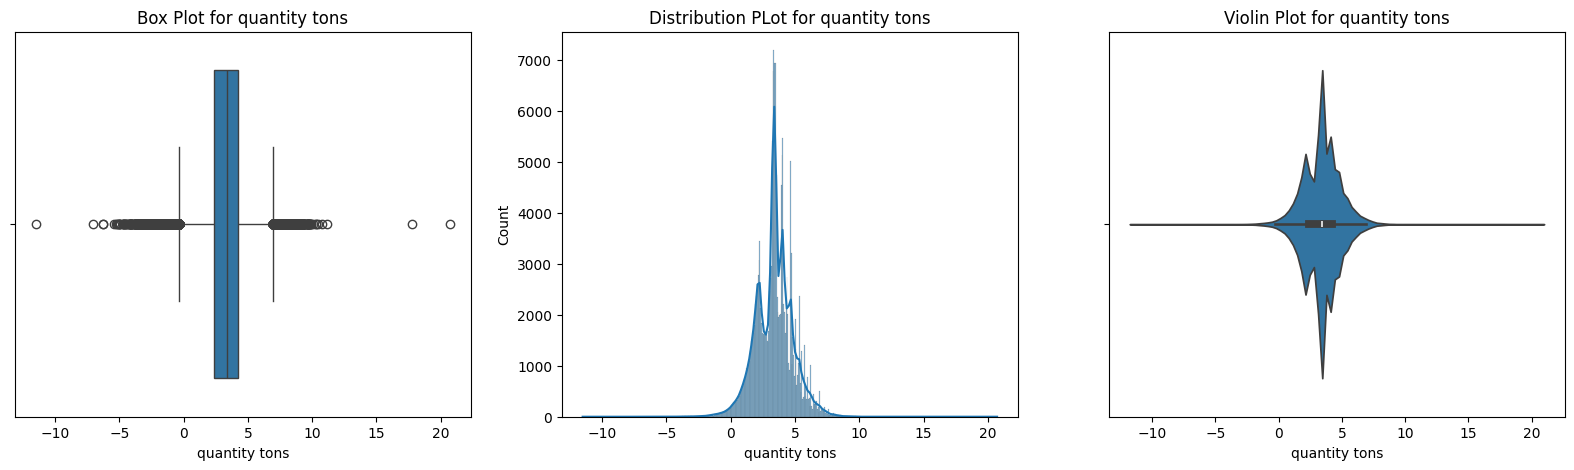

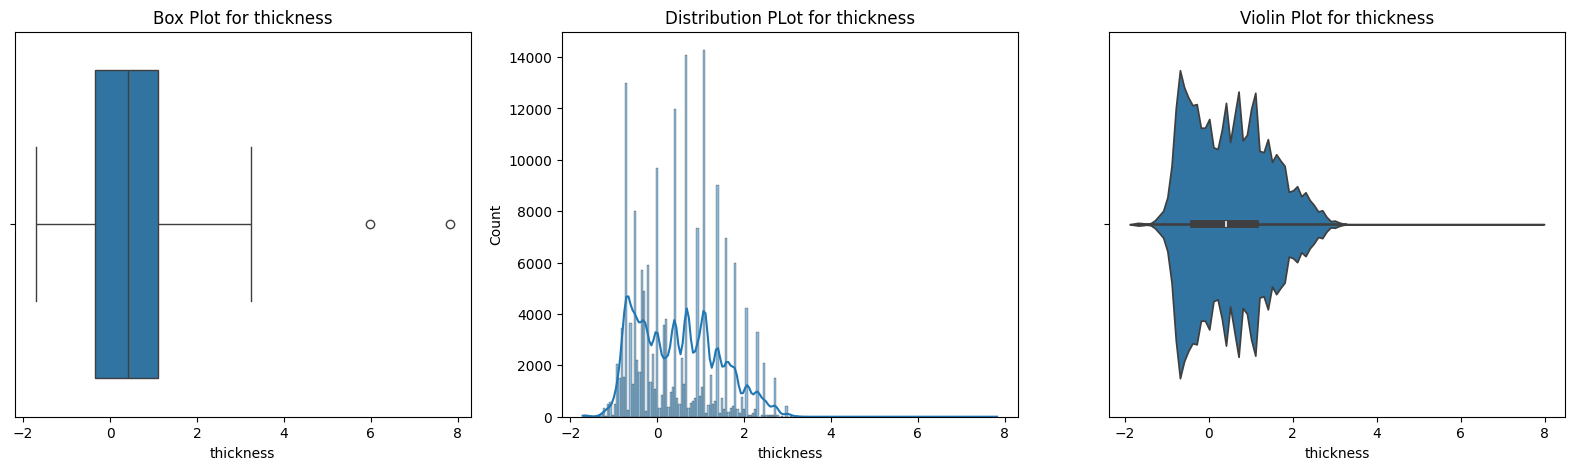

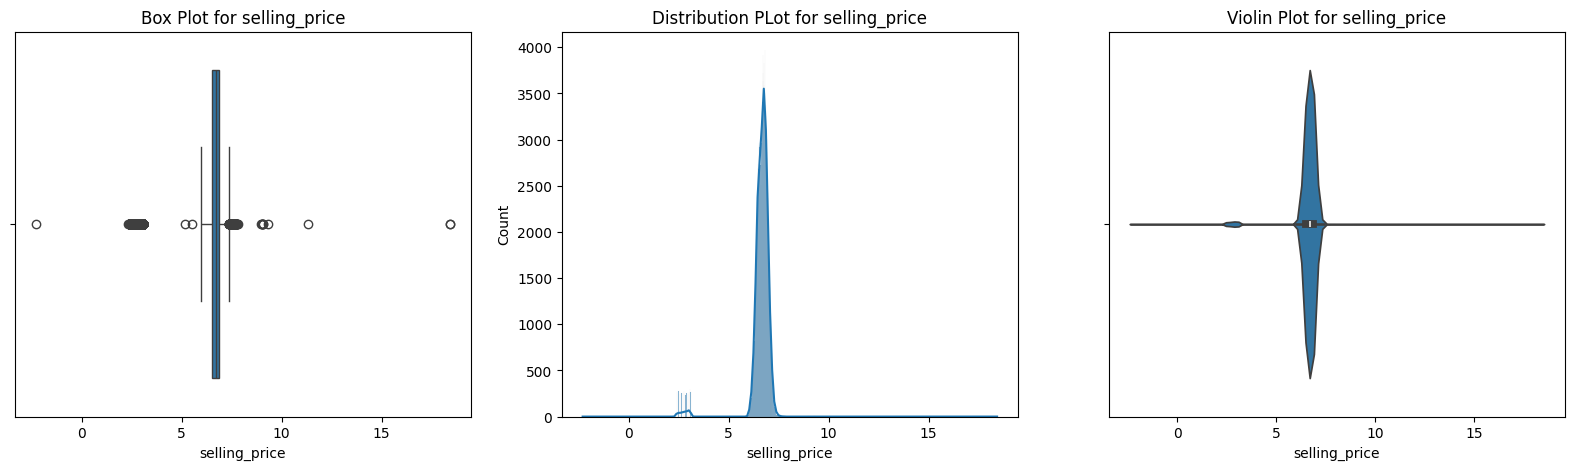

In [12]:
for i in ['quantity tons',  'thickness', 'selling_price']:
    plot(df, i)

In [19]:
# Treating the outliers using IQR

def outlier(df, column):
    percentile25=df[column].quantile(0.25)
    percentile75=df[column].quantile(0.75)
    iqr=percentile75-percentile25

    upper_limit=percentile75+1.5*iqr
    lower_limit=percentile25-1.5*iqr

    # Replace outliers with upper or lower limit
    df[column] = df[column].apply(lambda x: upper_limit if x > upper_limit else (lower_limit if x < lower_limit else x))
    return df[column]
    



outlier(df, 'quantity tons')
outlier(df, 'thickness')
outlier(df, 'width')
outlier(df, 'selling_price')

0         6.749931
1         6.953684
2         6.468211
3         6.643790
4         6.357842
            ...   
181657    6.400257
181658    6.381816
181659    6.378426
181660    6.428105
181661    6.408529
Name: selling_price, Length: 181662, dtype: float64

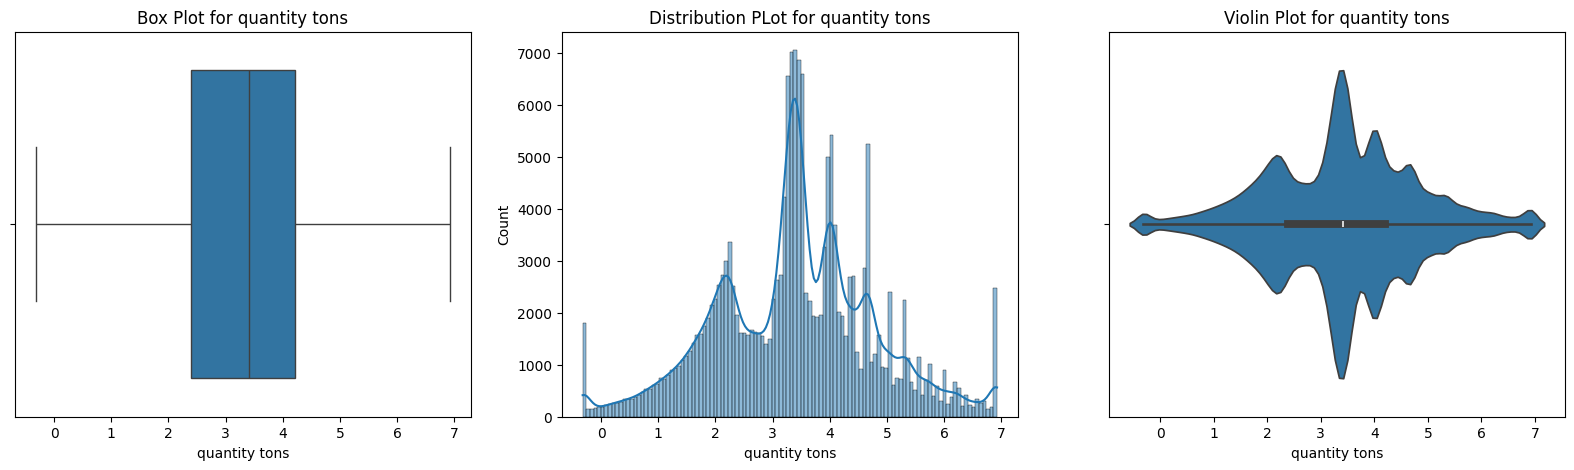

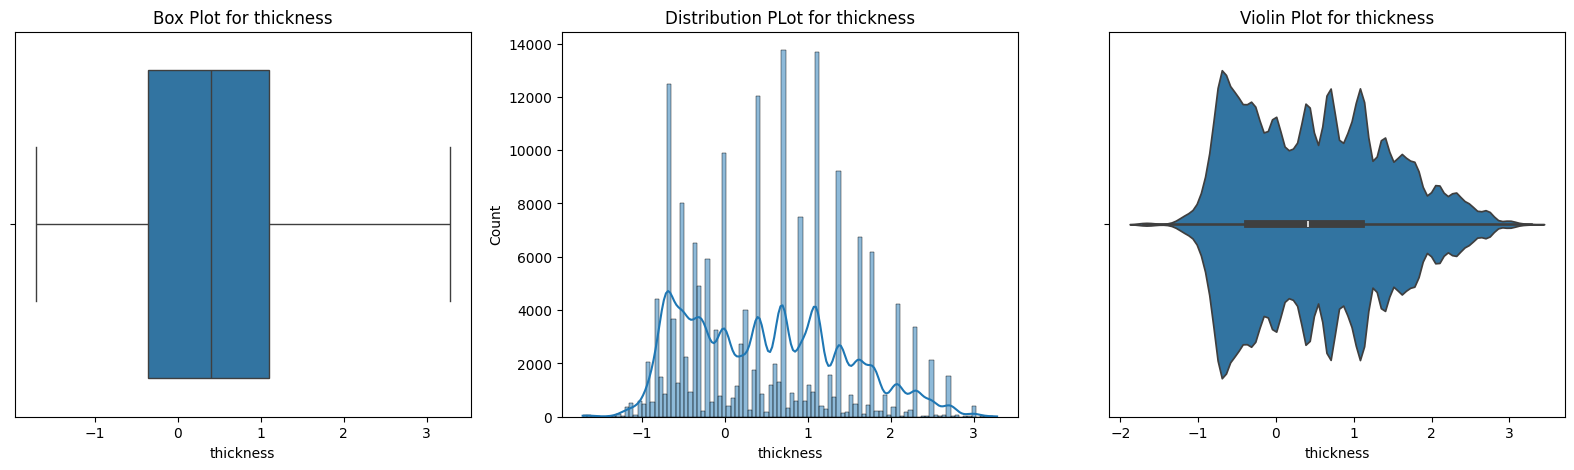

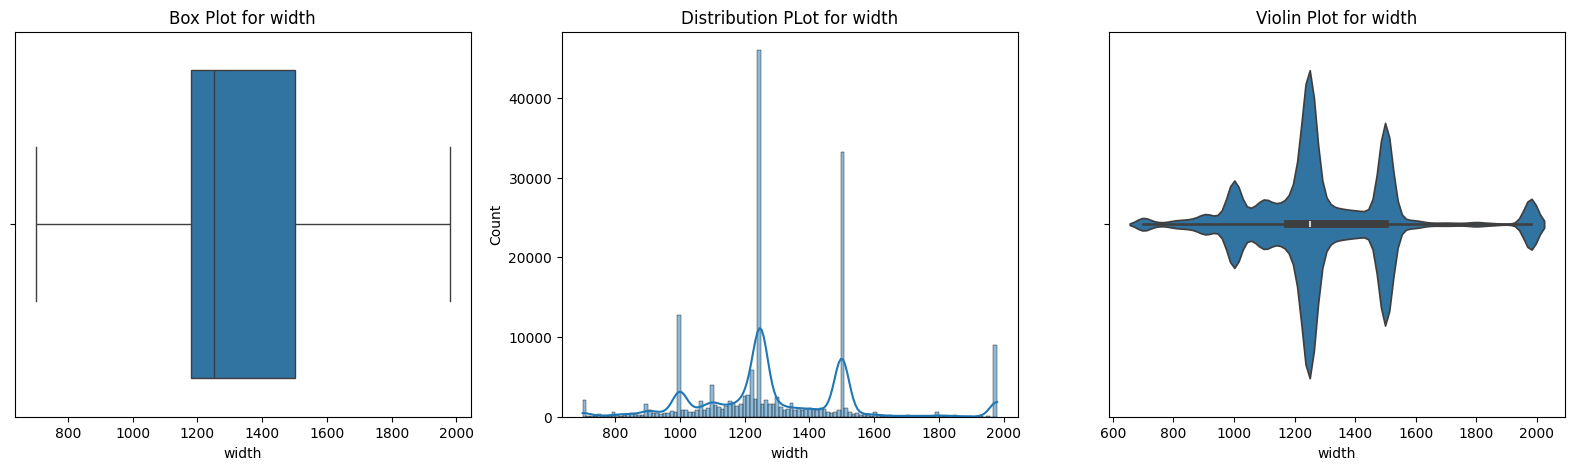

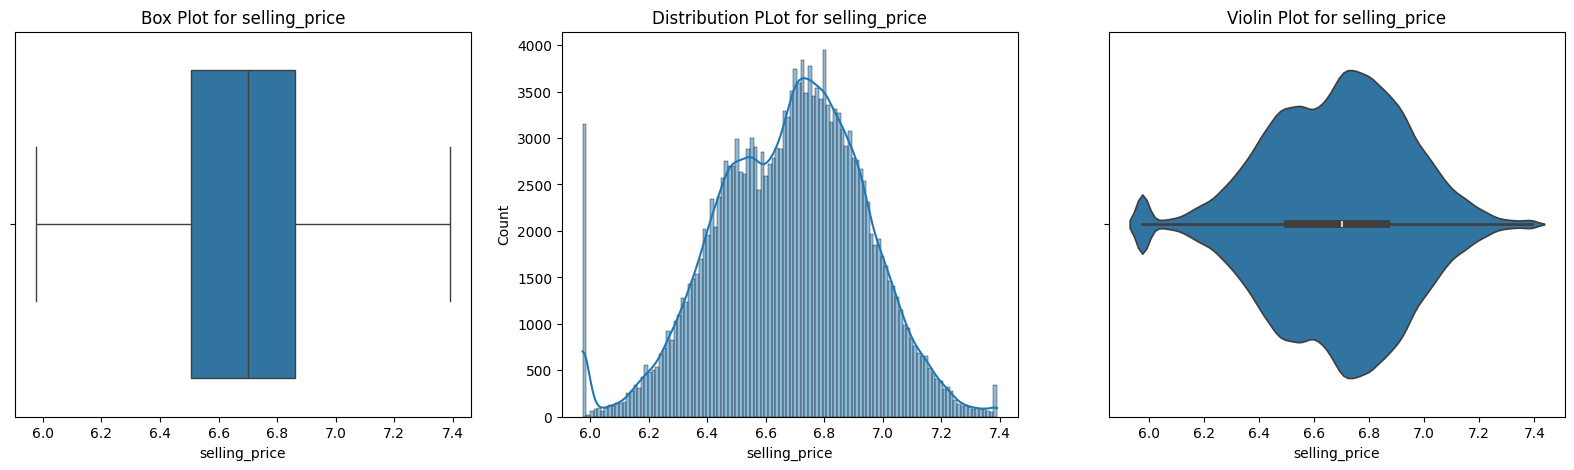

In [20]:
for i in ['quantity tons','thickness', 'width', 'selling_price']:
    plot(df, i)

In [21]:
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,3.991779,30156308.0,28.0,1,1,1.0,0.693147,1500.0,1670798778,2021-07-01,6.749931
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,6.643822,30202938.0,25.0,1,1,41.0,-0.223144,1210.0,1668701718,2021-04-01,6.953684
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,5.956169,30153963.0,3.0,1,2,28.0,-0.967584,952.0,628377,2021-01-01,6.468211
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,5.310301,30349574.0,32.0,1,3,59.0,0.832909,1317.0,1668701718,2021-01-01,6.643790
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,6.666354,3021156.0,28.0,1,1,1.0,1.386294,1980.0,640665,2021-03-01,6.357842


<Axes: >

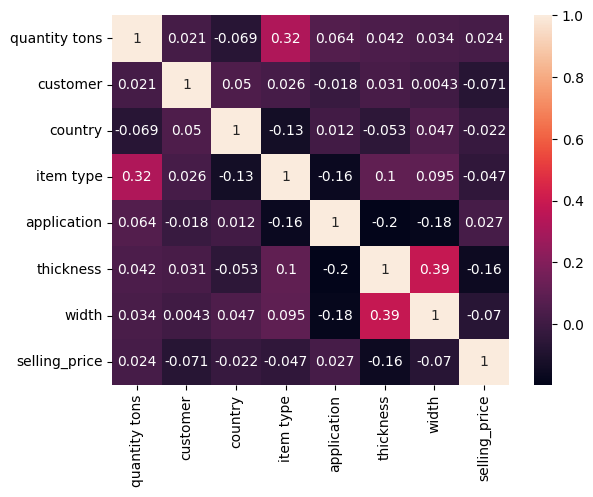

In [13]:
col=['quantity tons', 'customer', 'country', 'item type', 'application', 'thickness', 'width', 'selling_price']
heatmap=df[col].corr()
sns.heatmap(heatmap, annot=True)

In [14]:
df_scaled=df.copy()
df_1=df.copy()

In [15]:
df_scaled.isnull().sum()

id               2
item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
delivery date    0
selling_price    5
dtype: int64

In [16]:
df_scaled['selling_price']=df['selling_price'].fillna(df['selling_price'].mean())

In [23]:
# Std Scaler


scaler=StandardScaler()

In [27]:
# Detecting Inf and NaN values
print(df_scaled.isin([np.inf, -np.inf]).sum())  # Count of Inf values in each column
print(df_scaled.isna().sum())  # Count of NaN values in each column

id               0
item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
delivery date    0
selling_price    7
dtype: int64
id               2
item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
delivery date    0
selling_price    0
dtype: int64


In [28]:
# Remove rows with Inf or NaN values
df_scaled.replace([np.inf, -np.inf], np.nan, inplace=True)  # Replace inf with NaN first
df_scaled.dropna(inplace=True)  # Drop rows with NaN values

In [30]:
col_names=['quantity tons','customer','country','item type','application','thickness','width','product_ref','selling_price']
features=df_scaled[col_names]
scaler_=scaler.fit(features.values)

df_scaled[col_names]=scaler_.transform(features.values)
df_scaled

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,0.415032,0.091588,-0.572739,1,-0.805843,-0.953723,0.227899,0.782399,1.668049,2021-07-01,0.219381
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,2.250480,0.093402,-0.687686,1,-0.805843,0.921200,-0.753529,-0.325992,1.665126,2021-04-01,0.579780
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,1.774563,0.091497,-1.530629,1,0.088984,0.311850,-1.550891,-1.312077,-0.659690,2021-01-01,-0.278925
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,1.327565,0.099108,-0.419477,1,0.983810,1.764915,0.377597,0.082966,1.665126,2021-01-01,0.031638
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,2.266074,-0.964303,-0.572739,1,-0.805843,-0.953723,0.970321,2.693417,-0.659673,2021-03-01,-0.474146
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181657,0B812591-B501-4F34-859A-B06381FAEB44,2020-07-02,0.884975,0.093321,-0.687686,1,-0.805843,0.921200,-0.558247,-0.211331,-0.431799,2020-07-01,-0.399122
181658,DE633116-D1DF-4846-982E-55EFC3658A76,2020-07-02,0.856523,0.093321,-0.687686,1,-0.805843,0.921200,-0.558247,-0.287772,-0.431799,2020-07-01,-0.431741
181659,A48374B1-E6DB-45F2-889A-1F9C27C099EB,2020-07-02,1.346703,0.093321,-0.687686,1,-0.805843,0.921200,-0.569462,0.782399,-0.431799,2020-07-01,-0.437737
181660,91643238-5C7B-4237-9A5F-63AE3D35F320,2020-07-02,-1.348586,0.093321,-0.687686,1,-0.805843,0.921200,-0.881360,-0.173110,-0.431799,2020-07-01,-0.349864


In [ ]:
import pickle
with open('scale_.pkl', 'wb') as file:
    pickle.dump(scaler_,file)

In [ ]:
df_scaled['status'].value_counts()

status
1    116005
4     34436
5     19573
7      4276
3      4169
2      3139
8        53
9        10
6         1
Name: count, dtype: int64

In [34]:
df_scaled=df_scaled.query('status==1 or status==4') # 1-Won & 4- Lost
df_scaled

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,0.415032,0.091588,-0.572739,1,-0.805843,-0.953723,0.227899,0.782399,1.668049,2021-07-01,0.219381
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,2.250480,0.093402,-0.687686,1,-0.805843,0.921200,-0.753529,-0.325992,1.665126,2021-04-01,0.579780
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,1.774563,0.091497,-1.530629,1,0.088984,0.311850,-1.550891,-1.312077,-0.659690,2021-01-01,-0.278925
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,1.327565,0.099108,-0.419477,1,0.983810,1.764915,0.377597,0.082966,1.665126,2021-01-01,0.031638
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,2.266074,-0.964303,-0.572739,1,-0.805843,-0.953723,0.970321,2.693417,-0.659673,2021-03-01,-0.474146
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181657,0B812591-B501-4F34-859A-B06381FAEB44,2020-07-02,0.884975,0.093321,-0.687686,1,-0.805843,0.921200,-0.558247,-0.211331,-0.431799,2020-07-01,-0.399122
181658,DE633116-D1DF-4846-982E-55EFC3658A76,2020-07-02,0.856523,0.093321,-0.687686,1,-0.805843,0.921200,-0.558247,-0.287772,-0.431799,2020-07-01,-0.431741
181659,A48374B1-E6DB-45F2-889A-1F9C27C099EB,2020-07-02,1.346703,0.093321,-0.687686,1,-0.805843,0.921200,-0.569462,0.782399,-0.431799,2020-07-01,-0.437737
181660,91643238-5C7B-4237-9A5F-63AE3D35F320,2020-07-02,-1.348586,0.093321,-0.687686,1,-0.805843,0.921200,-0.881360,-0.173110,-0.431799,2020-07-01,-0.349864


In [35]:
# checking the scaled data for balance in status column.
status=df_scaled['status'].value_counts()
status

status
1    115999
4     34436
Name: count, dtype: int64

Axes(0.22375,0.11;0.5775x0.77)


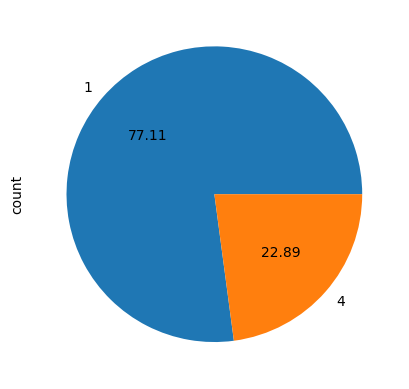

In [36]:
# Since data for Status column of Won & Lost is imbalanced, data to be balanced by SMOTE Oversampling.
# Show pie plot (Approach 1)
plot=status.plot.pie(autopct='%.2f', labels=status.index)
print(plot)

In [37]:
x=df_scaled[['quantity tons', 'customer', 'country', 'item type', 'application', 'thickness', 'width', 'product_ref', 'selling_price']]
y=df_scaled['status']

In [38]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=42)

In [39]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((120348, 9), (30087, 9), (120348,), (30087,))

In [40]:
df_scaled.isnull().sum()

id               0
item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

Text(0.5, 1.0, 'Over-sampling using SMOTE')

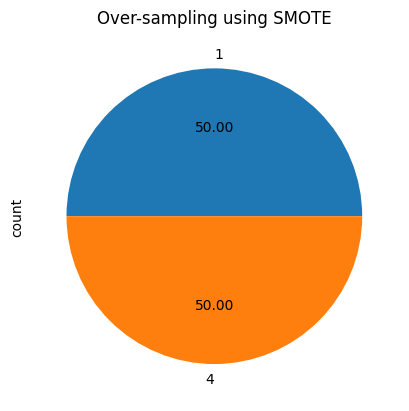

In [41]:
smote=SMOTE()

x_train_smote, y_train_smote= smote.fit_resample(x_train, y_train)

# You can check the class distribution after applying SMOTE

ax=y_train_smote.value_counts().plot.pie(autopct="%.2f")
ax.set_title("Over-sampling using SMOTE")

In [42]:
y_train_smote.value_counts()

status
1    92883
4    92883
Name: count, dtype: int64

In [43]:
# Checking the best classifier model to predict the Status.

def best_classifier_algorithm(x_train_smote,y_train_smote, x_test, y_test, algorithm):

    # Model building
    model=algorithm.fit(x_train_smote, y_train_smote)

    # Predict for train and test accuracy

    y_train_pred = model.predict(x_train_smote)

    y_test_pred  = model.predict(x_test)

    # Accuracy score

    training=accuracy_score(y_train_smote, y_train_pred)
    testing=accuracy_score(y_test, y_test_pred)

    
    classifier={'Algorithm': model.__class__.__name__, 'Training score': training, 'Testing score': testing}

    return classifier

In [44]:


classifier_result = best_classifier_algorithm(x_train_smote, y_train_smote, x_test, y_test, RandomForestClassifier())
print(classifier_result)

classifier_result = best_classifier_algorithm(x_train_smote, y_train_smote, x_test, y_test, ExtraTreesClassifier())
print(classifier_result)

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform labels in y_train_smote
y_train_encoded = label_encoder.fit_transform(y_train_smote)

# Transform labels in y_test
y_test_encoded = label_encoder.transform(y_test)

# Then, proceed with training and testing your classifier
classifier_result = best_classifier_algorithm(x_train_smote, y_train_encoded, x_test, y_test_encoded, XGBClassifier())
print(classifier_result)

classifier_result = best_classifier_algorithm(x_train_smote, y_train_smote, x_test, y_test, LogisticRegression())
print(classifier_result)

{'Algorithm': 'RandomForestClassifier', 'Training score': 1.0, 'Testing score': 0.9335925815136106}
{'Algorithm': 'ExtraTreesClassifier', 'Training score': 1.0, 'Testing score': 0.9265463489214611}
{'Algorithm': 'XGBClassifier', 'Training score': 0.9183811892380737, 'Testing score': 0.8761591384983548}
{'Algorithm': 'LogisticRegression', 'Training score': 0.671032374061992, 'Testing score': 0.6629108917472663}


Random Forest Classifier gives more accuracy for prediction.

In [45]:
classifier=best_classifier_algorithm(x_train_smote, y_train_smote, x_test, y_test, RandomForestClassifier())
classifier

{'Algorithm': 'RandomForestClassifier',
 'Training score': 1.0,
 'Testing score': 0.9339914248678831}

In [46]:
# Increasing the accuracy by GridSearchCV technique

params={'max_depth':[10,15,20,25],
        'min_samples_split': [2,4,6],
        'min_samples_leaf':[1,2]
        }

In [47]:
gcv=GridSearchCV(estimator=RandomForestClassifier(), param_grid=params)

In [ ]:
# gcv.fit(x_train_smote,y_train_smote)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 15, 20, 25],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4, 6]})

In [ ]:

# model=gcv.best_estimator_
# print(model)

RandomForestClassifier(max_depth=25)


In [48]:
classifier=RandomForestClassifier(max_depth=25)
model=classifier.fit(x_train_smote, y_train_smote)

In [ ]:
with open('status_model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [49]:
def accuracy_test():

    y_train_pred = model.predict(x_train_smote)

    y_test_pred  = model.predict(x_test)

    # Accuracy score

    training=accuracy_score(y_train_pred, y_train_smote)
    testing=accuracy_score(y_test_pred, y_test)

    return training, testing
accuracy_test()

(0.9961456886620802, 0.931731312527005)

In [50]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

In [ ]:
y_train_pred = model.predict(x_train_smote)

y_test_pred  = model.predict(x_test)

print(confusion_matrix(y_true=y_test, y_pred=y_test_pred))
# print(classification_report(y_true=y_test, y_pred=y_test_pred))

[[21826  1267]
 [  789  6207]]


In [ ]:
print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

           1       0.97      0.95      0.96     23093
           4       0.83      0.89      0.86      6996

    accuracy                           0.93     30089
   macro avg       0.90      0.92      0.91     30089
weighted avg       0.93      0.93      0.93     30089



Selling Price Prediction.

In [51]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [52]:
df=df_1.copy()
df

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,3.991779,30156308.0,28.0,1,1,1.0,0.693147,1500.0,1670798778,2021-07-01,6.749931
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,6.643822,30202938.0,25.0,1,1,41.0,-0.223144,1210.0,1668701718,2021-04-01,6.953684
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,5.956169,30153963.0,3.0,1,2,28.0,-0.967584,952.0,628377,2021-01-01,6.468211
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,5.310301,30349574.0,32.0,1,3,59.0,0.832909,1317.0,1668701718,2021-01-01,6.643790
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,6.666354,3021156.0,28.0,1,1,1.0,1.386294,2000.0,640665,2021-03-01,6.357842
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181657,0B812591-B501-4F34-859A-B06381FAEB44,2020-07-02,4.670802,30200854.0,25.0,1,1,41.0,-0.040822,1240.0,164141591,2020-07-01,6.400257
181658,DE633116-D1DF-4846-982E-55EFC3658A76,2020-07-02,4.629691,30200854.0,25.0,1,1,41.0,-0.040822,1220.0,164141591,2020-07-01,6.381816
181659,A48374B1-E6DB-45F2-889A-1F9C27C099EB,2020-07-02,5.337954,30200854.0,25.0,1,1,41.0,-0.051293,1500.0,164141591,2020-07-01,6.378426
181660,91643238-5C7B-4237-9A5F-63AE3D35F320,2020-07-02,1.443523,30200854.0,25.0,1,1,41.0,-0.342490,1250.0,164141591,2020-07-01,6.428105


In [53]:
df['selling_price']=df['selling_price'].fillna(df['selling_price'].mean())

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181662 entries, 0 to 181661
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181660 non-null  object 
 1   item_date      181662 non-null  object 
 2   quantity tons  181662 non-null  float64
 3   customer       181662 non-null  float64
 4   country        181662 non-null  float64
 5   status         181662 non-null  int64  
 6   item type      181662 non-null  int64  
 7   application    181662 non-null  float64
 8   thickness      181662 non-null  float64
 9   width          181662 non-null  float64
 10  product_ref    181662 non-null  int64  
 11  delivery date  181662 non-null  object 
 12  selling_price  181662 non-null  float64
dtypes: float64(7), int64(3), object(3)
memory usage: 18.0+ MB


In [55]:
col_names=['quantity tons','customer','country', 'status', 'item type','application','thickness','width','product_ref']
features=df[col_names]
scaler_1=scaler.fit(features.values)

df[col_names]=scaler_1.transform(features.values)
df

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,0.415038,0.091591,-0.572718,-0.70267,-0.805814,-0.953744,0.227824,0.782432,1.668008,2021-07-01,6.749931
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,2.250513,0.093406,-0.687666,-0.70267,-0.805814,0.921166,-0.753448,-0.325974,1.665086,2021-04-01,6.953684
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,1.774589,0.091500,-1.530615,-0.70267,0.089003,0.311820,-1.550683,-1.312074,-0.659704,2021-01-01,6.468211
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,1.327585,0.099112,-0.419455,-0.70267,0.983820,1.764875,0.377498,0.082990,1.665086,2021-01-01,6.643790
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,2.266107,-0.964323,-0.572718,-0.70267,-0.805814,-0.953744,0.970128,2.693479,-0.659687,2021-03-01,6.357842
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181657,0B812591-B501-4F34-859A-B06381FAEB44,2020-07-02,0.884988,0.093325,-0.687666,-0.70267,-0.805814,0.921166,-0.558197,-0.211312,-0.431816,2020-07-01,6.400257
181658,DE633116-D1DF-4846-982E-55EFC3658A76,2020-07-02,0.856536,0.093325,-0.687666,-0.70267,-0.805814,0.921166,-0.558197,-0.287753,-0.431816,2020-07-01,6.381816
181659,A48374B1-E6DB-45F2-889A-1F9C27C099EB,2020-07-02,1.346723,0.093325,-0.687666,-0.70267,-0.805814,0.921166,-0.569411,0.782432,-0.431816,2020-07-01,6.378426
181660,91643238-5C7B-4237-9A5F-63AE3D35F320,2020-07-02,-1.348605,0.093325,-0.687666,-0.70267,-0.805814,0.921166,-0.881259,-0.173091,-0.431816,2020-07-01,6.428105


In [ ]:
with open('scaler_price.pkl', 'wb') as file:
    pickle.dump(scaler_1, file)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181653 entries, 0 to 181661
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181653 non-null  object 
 1   item_date      181653 non-null  object 
 2   quantity tons  181653 non-null  float64
 3   customer       181653 non-null  float64
 4   country        181653 non-null  float64
 5   status         181653 non-null  float64
 6   item type      181653 non-null  float64
 7   application    181653 non-null  float64
 8   thickness      181653 non-null  float64
 9   width          181653 non-null  float64
 10  product_ref    181653 non-null  float64
 11  delivery date  181653 non-null  object 
 12  selling_price  181653 non-null  float64
dtypes: float64(10), object(3)
memory usage: 19.4+ MB


In [57]:
# Feature & Target setting
x = df[['quantity tons', 'customer', 'country', 'status', 'item type', 'application', 'thickness', 'width', 'product_ref' ]]
y = df['selling_price']

In [58]:
# Train & testing split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [71]:
# Clean the target variables to remove inf and NaN values
y_train = np.where(np.isinf(y_train), np.nan, y_train)
y_train = np.where(np.isnan(y_train), np.nanmean(y_train), y_train)
y_test = np.where(np.isinf(y_test), np.nan, y_test)
y_test = np.where(np.isnan(y_test), np.nanmean(y_test), y_test)

In [59]:
def machine_learning_regression(df, algorithm):


    # Model building
    model = algorithm().fit(x_train, y_train)
    
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)

   
    accuracy_metrics = {'algorithm': algorithm.__name__,
                        'R2_train' : r2_train,
                        'R2_test'  : r2_test}

    return accuracy_metrics


In [60]:
x_train.shape, y_train.shape

((145329, 9), (145329,))

In [61]:
x_test

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref
64226,-1.187540,0.093230,-0.572718,2.791532,-0.805814,-0.953744,0.227824,-0.173091,1.665085
26144,-0.825947,0.091828,1.572969,-0.702670,-0.805814,2.702330,-0.896450,0.285560,-0.431816
62024,-1.681630,0.096101,-0.572718,-0.702670,-0.805814,0.921166,-1.154714,-0.173091,-0.659727
87779,0.294141,0.100865,-0.419455,-0.702670,1.878637,0.264947,0.466793,-1.656063,1.668008
130690,-0.012692,-0.964357,-0.419455,-0.702670,0.983820,-0.953744,0.227824,-1.128614,1.195933
...,...,...,...,...,...,...,...,...,...
49099,0.479873,0.091661,-0.611034,1.626798,0.983820,0.921166,-1.256784,-0.727294,-0.659727
160195,0.503478,0.095972,-0.649350,-0.702670,-0.805814,0.218075,-0.651379,0.438444,-0.431816
34471,-0.842917,0.095905,-0.572718,-0.702670,-0.805814,1.764875,0.021810,-0.173091,-0.659687
62256,0.472308,-0.964323,-0.572718,1.044431,-0.805814,-0.953744,1.950329,-1.128614,1.668008


In [62]:
y_test

64226     6.863803
26144     7.044033
62024     6.957497
87779     6.517671
130690    6.483107
            ...   
49099     7.006695
160195    6.473891
34471     6.650279
62256     6.699500
117874    7.130099
Name: selling_price, Length: 36333, dtype: float64

In [68]:
# Remove rows with Inf or NaN values
df.replace([np.inf, -np.inf], np.nan, inplace=True)  # Replace inf with NaN first
df.dropna(inplace=True)  # Drop rows with NaN values

In [72]:
print(machine_learning_regression(df,LinearRegression))
print(machine_learning_regression(df,RandomForestRegressor))
print(machine_learning_regression(df,DecisionTreeRegressor))
print(machine_learning_regression(df,XGBRegressor))
print(machine_learning_regression(df, AdaBoostRegressor))
print(machine_learning_regression(df, GradientBoostingRegressor))


{'algorithm': 'LinearRegression', 'R2_train': 0.0351642779068152, 'R2_test': 0.03347236891550087}
{'algorithm': 'RandomForestRegressor', 'R2_train': 0.9896546314537016, 'R2_test': 0.9337318097224228}
{'algorithm': 'DecisionTreeRegressor', 'R2_train': 1.0, 'R2_test': 0.8901961762894746}
{'algorithm': 'XGBRegressor', 'R2_train': 0.9261109451807986, 'R2_test': 0.9193188809983055}
{'algorithm': 'AdaBoostRegressor', 'R2_train': 0.44436756925314436, 'R2_test': 0.43464881196123883}
{'algorithm': 'GradientBoostingRegressor', 'R2_train': 0.8922571231327676, 'R2_test': 0.8839882287489155}


In [73]:
# since Random Forest gives more accuracy
price=RandomForestRegressor().fit(x_train, y_train)

In [74]:
y_pred=price.predict(x_test)

In [75]:
y_pred

array([6.8218064 , 6.71901193, 6.92284004, ..., 6.71048032, 6.70238225,
       7.1293205 ])

In [76]:
from sklearn import metrics
from sklearn.metrics import r2_score

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))

Mean Absolute Error: 0.10570943641234748
Mean Squared Error: 0.020708148107830286
R2 Score: 0.9336725450738903


In [79]:
import pickle
with open('price1_model.pkl', 'wb') as file:
    pickle.dump(price, file)
